## Логистическая Регрессия и Стохастический Градиентный Спуск (SGD)

**1. Постановка Задачи: Что такое Логистическая Регрессия?**

Логистическая регрессия - это алгоритм классификации, используемый для прогнозирования вероятности того, что данная запись данных принадлежит одному из двух классов (бинарная классификация). Несмотря на слово "регрессия" в названии, это **классификационный алгоритм**.

В отличие от линейной регрессии, которая предсказывает непрерывные значения, логистическая регрессия стремится найти разделяющую линию (или гиперплоскость в многомерном пространстве), определяемую уравнением:
$$w_0 + w_1x_1 + w_2x_2 = 0 \implies \mathbf{w}^T \mathbf{x} = 0$$

где $\mathbf{w}$ - вектор весовых коэффициентов, а $\mathbf{x}$ - вектор признаков (с добавленной единицей для смещения $w_0$). Цель состоит в том, чтобы найти такой вектор $\mathbf{w}$, который наилучшим образом разделяет классы.

**2. Решение через Метод Максимального Правдоподобия (MLE):**

Для нахождения оптимального вектора весов $\mathbf{w}$ в логистической регрессии используется **метод максимального правдоподобия (Maximum Likelihood Estimation - MLE)**. Идея заключается в том, чтобы найти такие параметры $\mathbf{w}$, при которых вероятность (правдоподобие) наблюдаемых данных является максимальной.
Мы ищем $$ \underset{\mathbf{w}}{argmax} \, L(\mathbf{w}) $$

**Функция правдоподобия** для всей обучающей выборки (предполагая независимость наблюдений):
$$ L(\mathbf{w}) = P(Y | X, \mathbf{w}) = \prod_{i=1}^{n} P(y_i | \mathbf{x}_i, \mathbf{w}) $$

Для удобства вычислений обычно максимизируют **логарифмическое правдоподобие** (превращая произведение в сумму и избегая проблем с точностью малых чисел):
$$ \log L(\mathbf{w}) = \sum_{i=1}^{n} \log P(y_i | \mathbf{x}_i, \mathbf{w}) $$

Чтобы максимизировать логарифмическое правдоподобие ($ \underset{\mathbf{w}}{argmax} \, \log L(\mathbf{w}) $), мы эквивалентно **минимизируем отрицательное логарифмическое правдоподобие** $$ \underset{\mathbf{w}}{argmin} \, -\log L(\mathbf{w}) $$
$$ E(\mathbf{w}) = -\log L(\mathbf{w}) = \sum_{i=1}^{n} -\log P(y_i | \mathbf{x}_i, \mathbf{w}) $$


**3. Функция Сигмоиды: Преобразование в Вероятность**

Ключевым элементом логистической регрессии является **сигмоидная функция** (или логистическая функция). Она принимает любое действительное значение и отображает его в диапазон от 0 до 1, что идеально подходит для представления вероятности.

Формула сигмоиды:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

В контексте логистической регрессии $z$ является линейной комбинацией входных признаков и весов (т.е. $\mathbf{w}^T \mathbf{x}$):
$$ z = \mathbf{w}^T \mathbf{x} = w_0 + w_1x_1 + w_2x_2 $$

Таким образом, вероятность того, что объект принадлежит положительному классу ($y=1$), определяется сигмоидой:
$$ P(y=1 | \mathbf{x}, \mathbf{w}) = \sigma(\mathbf{w}^T \mathbf{x}) $$

Если метки классов $y$ определены как $1$ и $-1$, то вероятность для класса $y$ может быть унифицированно записана как:
$$ P(y | \mathbf{x}, \mathbf{w}) = \sigma(y \cdot \mathbf{w}^T \mathbf{x}) = \frac{1}{1 + e^{-y \cdot \mathbf{w}^T \mathbf{x}}} $$

Теперь, подставив это выражение для $P(y_i | \mathbf{x}_i, \mathbf{w})$ в формулу отрицательного логарифмического правдоподобия из пункта 2, получаем **логарифмическую функцию потерь (log loss)**:
$$ E(\mathbf{w}) = \sum_{i=1}^{n} -\log \left( \frac{1}{1 + e^{-y_i \cdot \mathbf{w}^T \mathbf{x}_i}} \right) = \sum_{i=1}^{n} \log(1 + e^{-y_i \cdot \mathbf{w}^T \mathbf{x}_i}) $$

Если использовать обозначение $M_i = y_i \cdot \mathbf{w}^T \mathbf{x}_i$, то функция потерь для одного примера $i$ будет:
$$ L_i(\mathbf{w}) = \log(1 + e^{-M_i}) $$

Масштабирование основания логарифма не влияет на направление градиента, а только на его величину, что компенсируется шагом обучения.

**4. Стохастический Градиентный Спуск (SGD) для Оптимизации:**

Для минимизации функции потерь $E(\mathbf{w})$ (или её масштабированной версии) используется алгоритм оптимизации, такой как **Стохастический Градиентный Спуск (SGD)**.

SGD работает итеративно:
1.  **Выбор случайного образца:** На каждой итерации алгоритм случайно выбирает один обучающий пример $(x_k, y_k)$ из выборки.
2.  **Вычисление градиента:** Вычисляется градиент функции потерь только для этого одного примера по отношению к весам $\mathbf{w}$.

  $$ \frac{\partial L_k(\mathbf{w})}{\partial \mathbf{w}} = -\frac{e^{-M_k} \cdot \mathbf{x}_k^T \cdot y_k}{(1 + e^{-M_k}) \cdot \ln(2)} $$

3.  **Обновление весов:** Веса $\mathbf{w}$ корректируются в направлении, противоположном градиенту, чтобы уменьшить ошибку:

  $$ \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \frac{\partial L_k(\mathbf{w})}{\partial \mathbf{w}} $$
  где $\eta$ – это шаг обучения (learning rate или скорость сходимости).


Этот процесс повторяется множество раз (N итераций в вашем коде), пока веса не сойдутся к оптимальным значениям.

**5. Экспоненциальное Скользящее Среднее (Qe) для Сглаживания:**


Формула:
$ Q_e = \lambda \cdot L_k(\mathbf{w}) + (1 - \lambda) \cdot Q_e $

Где $\lambda$ - коэффициент сглаживания. Более высокое $\lambda$ придает больший вес текущему значению потерь, тогда как более низкое $\lambda$ придает больший вес предыдущим средним значениям, делая сглаживание более выраженным. `Qe` дает более стабильную оценку текущего уровня потерь, чем мгновенные потери на одном образце.

Доля ошибок: 0.07
Весовые коэффициенты w:
[-8.15553401 -0.15656274  1.78240069]


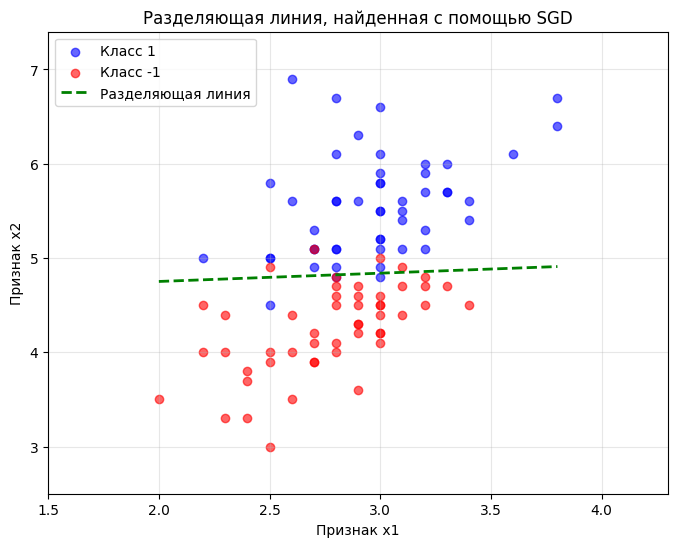

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = np.array([0.0, 0.0, 0.0]) # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD


np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел


margin_init = np.dot(w,x_train.T) * y_train
Qe = np.mean(margin_init < 0) # начальное значение среднего эмпирического риска
np.random.seed(0)

for _ in range(N):
    k = np.random.randint(0,n_train-1)
    x_k = x_train[k]
    y_k = y_train[k]
    w -= nt * df(w, x_k, y_k)
    Qe = lm * loss(w, x_k, y_k) + (1 - lm) * Qe

margin = np.dot(w,x_train.T) * y_train
Q = np.mean(margin < 0)


print(f"Доля ошибок: {Q}")
print(f"Весовые коэффициенты w:\n{w.flatten()}")

# Код для отображения финального графика (ИСПРАВЛЕННЫЙ)
plt.figure(figsize=(8, 6))

# Для построения разделяющей линии используем уравнение:
# w0 + w1*x1 + w2*x2 = 0
# Отсюда: x2 = -(w0 + w1*x1) / w2

line_x = np.linspace(min(x_train[:, 1]), max(x_train[:, 1]), 100)
# Пересчитываем эффективные коэффициенты
w_eff_0 = w[0]  # bias
w_eff_1 = w[1]  # коэффициент для x1
w_eff_2 = w[2]  # коэффициент для x2

# Вычисляем x2 для каждого x1
line_y = -(w_eff_0 + w_eff_1 * line_x) / w_eff_2

# Разделяем точки по классам
x_0 = x_train[y_train == 1]  # формирование точек для класса 1
x_1 = x_train[y_train == -1]  # формирование точек для класса -1

plt.scatter(x_0[:, 1], x_0[:, 2], color='blue', label='Класс 1', alpha=0.6)
plt.scatter(x_1[:, 1], x_1[:, 2], color='red', label='Класс -1', alpha=0.6)
plt.plot(line_x, line_y, color='green', linestyle='--', linewidth=2, label='Разделяющая линия')
plt.xlabel('Признак x1')
plt.ylabel('Признак x2')
plt.title('Разделяющая линия, найденная с помощью SGD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(min(x_train[:, 1]) - 0.5, max(x_train[:, 1]) + 0.5)
plt.ylim(min(x_train[:, 2]) - 0.5, max(x_train[:, 2]) + 0.5)
plt.show()

## Логистическая Регрессия и Стохастический Градиентный Спуск (SGD)

**1. Постановка Задачи: Что такое Логистическая Регрессия?**

Логистическая регрессия — это алгоритм классификации, используемый для прогнозирования вероятности того, что данная запись данных принадлежит одному из двух классов (бинарная классификация). Несмотря на слово "регрессия" в названии, это **классификационный алгоритм**.

В отличие от линейной регрессии, которая предсказывает непрерывные значения, логистическая регрессия стремится найти разделяющую линию (или гиперплоскость в многомерном пространстве), определяемую уравнением:
$$
w_0 + w_1x_1 + w_2x_2 = 0 \implies \mathbf{w}^T \mathbf{x} = 0
$$

где $\mathbf{w}$ — вектор весовых коэффициентов, а $\mathbf{x}$ — вектор признаков (с добавленной единицей для смещения $w_0$). Цель состоит в том, чтобы найти такой вектор $\mathbf{w}$, который наилучшим образом разделяет классы.


**2. Решение через Метод Максимального Правдоподобия (MLE)**

Для нахождения оптимального вектора весов $\mathbf{w}$ в логистической регрессии используется **метод максимального правдоподобия (Maximum Likelihood Estimation - MLE)**. Идея заключается в том, чтобы найти такие параметры $\mathbf{w}$, при которых вероятность наблюдаемых данных максимальна:
$$
\underset{\mathbf{w}}{\mathrm{argmax}} , L(\mathbf{w})
$$

**Функция правдоподобия** для всей обучающей выборки (при независимости наблюдений):
$$
L(\mathbf{w}) = P(Y | X, \mathbf{w}) = \prod_{i=1}^{n} P(y_i | \mathbf{x}_i, \mathbf{w})
$$

Для удобства вычислений обычно используют **логарифмическое правдоподобие**:
$$
\log L(\mathbf{w}) = \sum_{i=1}^{n} \log P(y_i | \mathbf{x}_i, \mathbf{w})
$$

Максимизация логарифмического правдоподобия эквивалентна минимизации **отрицательного логарифмического правдоподобия**:
$$
E(\mathbf{w}) = -\log L(\mathbf{w}) = \sum_{i=1}^{n} -\log P(y_i | \mathbf{x}_i, \mathbf{w})
$$


**3. Функция Сигмоиды: Преобразование в Вероятность**

Сигмоида отображает любое действительное число в диапазон от 0 до 1:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

В логистической регрессии $z$ — это линейная комбинация признаков и весов:
$$
z = \mathbf{w}^T \mathbf{x} = w_0 + w_1x_1 + w_2x_2
$$

Вероятность принадлежности положительному классу ((y=1)) задаётся как:
$$
P(y=1 \mid \mathbf{x}, \mathbf{w}) = \sigma(\mathbf{w}^T \mathbf{x})
$$

Вероятность отрицательного класса ((y=0)):
$$
P(y=0 \mid \mathbf{x}, \mathbf{w}) = 1 - \sigma(\mathbf{w}^T \mathbf{x})
$$

Объединённая формула для одного примера:
$$
P(y \mid \mathbf{x}, \mathbf{w}) = [\sigma(\mathbf{w}^T \mathbf{x})]^y \cdot [1 - \sigma(\mathbf{w}^T \mathbf{x})]^{1-y}
$$


**4. Логарифмическая Функция Потерь (Log Loss)**

Берём отрицательный логарифм правдоподобия для одного примера:
$$
L_i(\mathbf{w}) = - \big[ y_i \log \sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i) \log (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) \big]
$$

Для всей обучающей выборки:
$$
E(\mathbf{w}) = \sum_{i=1}^{n} L_i(\mathbf{w}) = \sum_{i=1}^{n} - \big[ y_i \log \sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i) \log (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) \big]
$$


**5. Стохастический Градиентный Спуск (SGD) для Оптимизации**

Чтобы минимизировать функцию потерь $E(\mathbf{w})$, используется **Стохастический Градиентный Спуск (SGD)**.

Итерации SGD:

1. **Выбор случайного образца** $(x_k, y_k)$.
2. **Вычисление градиента** функции потерь для одного примера:
   $$
   \frac{\partial L_k(\mathbf{w})}{\partial \mathbf{w}} = (\sigma(\mathbf{w}^T \mathbf{x}_k) - y_k) \cdot \mathbf{x}_k
   $$
3. **Обновление весов**:
   $$
   \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \frac{\partial L_k(\mathbf{w})}{\partial \mathbf{w}}
   $$
   где $\eta$ — шаг обучения (learning rate).


**6. Экспоненциальное Скользящее Среднее (Qe) для Сглаживания**

Формула:
$$
Q_e = \lambda \cdot L_k(\mathbf{w}) + (1 - \lambda) \cdot Q_e
$$

Где $\lambda$ — коэффициент сглаживания. Более высокое $\lambda$ придаёт больший вес текущему значению потерь, а более низкое — предыдущим средним, делая сглаживание более стабильным. `Qe` даёт более устойчивую оценку текущего уровня потерь, чем мгновенные значения на одном примере.


Доля ошибок: 0.07
Весовые коэффициенты w:
[-6.49856238 -0.08761239  1.39958945]


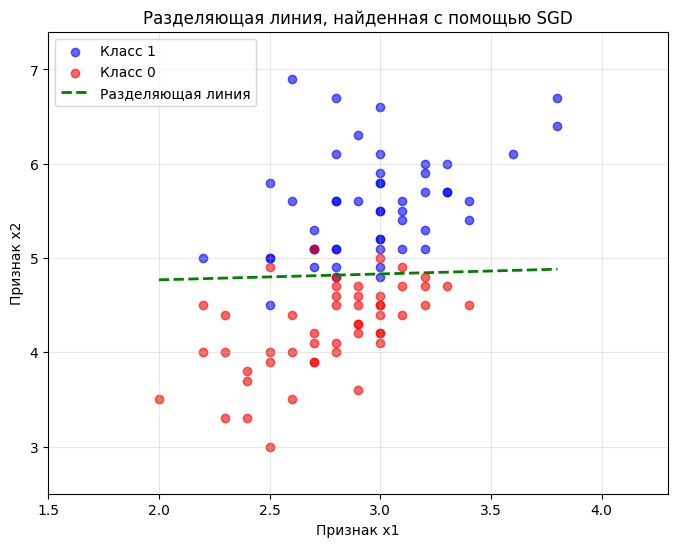

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# логарифмическая функция потерь для меток 0/1
def loss(w, x, y):
    z = np.dot(w, x)
    return - (y * np.log2(1 / (1 + np.exp(-z))) + (1 - y) * np.log2(1 - 1 / (1 + np.exp(-z))))

# производная логарифмической функции потерь для меток 0/1
def df(w, x, y):
    z = np.dot(w, x)
    sigma = 1 / (1 + np.exp(-z))
    return (sigma - y) * x  # градиент log loss для одного примера

# данные (признаки)
data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5),
          (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7),
          (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9),
          (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8),
          (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1),
          (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2),
          (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1),
          (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3),
          (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0),
          (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4),
          (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1),
          (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7),
          (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5),
          (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5),
          (3.0, 5.0), (3.8, 6.4)]

# метки 0/1
data_y = [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]

# добавляем единичный признак для bias
x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)
w = np.array([0.0, 0.0, 0.0])  # начальные веса
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для w0, w1, w2
lm = 0.01  # коэффициент для экспоненциального скользящего среднего
N = 1000  # число итераций SGD

np.random.seed(0)

# начальное значение эмпирического риска
margin_init = np.dot(w, x_train.T)
Qe = np.mean((margin_init > 0) != y_train)

for _ in range(N):
    k = np.random.randint(0, n_train)
    x_k = x_train[k]
    y_k = y_train[k]
    w -= nt * df(w, x_k, y_k)
    Qe = lm * loss(w, x_k, y_k) + (1 - lm) * Qe

# доля ошибок на обучающей выборке
margin = np.dot(w, x_train.T)
Q = np.mean((margin > 0) != y_train)

print(f"Доля ошибок: {Q}")
print(f"Весовые коэффициенты w:\n{w.flatten()}")

# визуализация
plt.figure(figsize=(8, 6))

# разделяющая линия: x2 = -(w0 + w1*x1)/w2
line_x = np.linspace(min(x_train[:, 1]), max(x_train[:, 1]), 100)
line_y = -(w[0] + w[1] * line_x) / w[2]

# разделяем точки по классам
x_0 = x_train[y_train == 1]  # класс 1
x_1 = x_train[y_train == 0]  # класс 0

plt.scatter(x_0[:, 1], x_0[:, 2], color='blue', label='Класс 1', alpha=0.6)
plt.scatter(x_1[:, 1], x_1[:, 2], color='red', label='Класс 0', alpha=0.6)
plt.plot(line_x, line_y, color='green', linestyle='--', linewidth=2, label='Разделяющая линия')
plt.xlabel('Признак x1')
plt.ylabel('Признак x2')
plt.title('Разделяющая линия, найденная с помощью SGD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(min(x_train[:, 1]) - 0.5, max(x_train[:, 1]) + 0.5)
plt.ylim(min(x_train[:, 2]) - 0.5, max(x_train[:, 2]) + 0.5)
plt.show()